In [1]:
%%writefile compound.py
import streamlit as st
import matplotlib.pyplot as plt

# Function to calculate future value
def calculate_future_value(principal, rate, years):
    return principal * ((1 + rate / 100) ** years)

# Streamlit UI
st.title("Lumpsum Investment Future Value Calculator")

# User input
principal = st.number_input("Enter Lumpsum Investment Amount (INR)", min_value=1000, value=100000)
cagr = st.number_input("Enter Expected CAGR (%)", min_value=0.0, value=12.0)

years_list = [10, 20, 25]

# Future values
future_values = [calculate_future_value(principal, cagr, y) for y in years_list]
investments = [principal for _ in years_list]
gains = [fv - principal for fv in future_values]

# Display results
st.subheader("Future Value Estimates")
for y, fv, g in zip(years_list, future_values, gains):
    st.write(f"📈 After {y} years: ₹{fv:,.2f} (Gain: ₹{g:,.2f})")

# Plotting
fig, ax = plt.subplots()
ax.plot(years_list, future_values, marker='o', label="Future Value", color='green')
ax.plot(years_list, investments, '--', label="Invested Amount", color='blue')
ax.set_xlabel("Years")
ax.set_ylabel("Value (INR)")
ax.set_title("Investment Growth Over Time")
ax.legend()
ax.grid(True)

# Show graph
st.pyplot(fig)


Overwriting compound.py


In [2]:
%%writefile compound.py
import streamlit as st
import matplotlib.pyplot as plt

# Function for lumpsum future value
def calculate_lumpsum(principal, rate, years):
    return principal * ((1 + rate / 100) ** years)

# Function for SIP future value
def calculate_sip(monthly_investment, rate, years):
    r = rate / 100 / 12
    n = years * 12
    return monthly_investment * (((1 + r) ** n - 1) * (1 + r) / r)

# Streamlit App
st.title("📊 Investment Calculator - Lumpsum & SIP")

tab1, tab2 = st.tabs(["💰 Lumpsum Calculator", "📆 SIP Calculator"])

# -------------------- Lumpsum Tab --------------------
with tab1:
    st.header("💰 Lumpsum Investment")

    principal = st.number_input("Enter Lumpsum Investment Amount (₹)", min_value=1000, value=100000)
    cagr = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=12.0)

    years_list = [10, 20, 25]
    fv_list = [calculate_lumpsum(principal, cagr, y) for y in years_list]
    gains = [fv - principal for fv in fv_list]

    st.subheader("📈 Future Value Estimates")
    for y, fv, g in zip(years_list, fv_list, gains):
        st.write(f"**After {y} years**: ₹{fv:,.2f} (Gain: ₹{g:,.2f})")

    # Plot
    fig1, ax1 = plt.subplots()
    ax1.plot(years_list, fv_list, marker='o', color='green', label="Future Value")
    ax1.axhline(y=principal, linestyle='--', color='blue', label="Initial Investment")
    ax1.set_title("Lumpsum Investment Growth")
    ax1.set_xlabel("Years")
    ax1.set_ylabel("Value (₹)")
    ax1.grid(True)
    ax1.legend()
    st.pyplot(fig1)

# -------------------- SIP Tab --------------------
with tab2:
    st.header("📆 Monthly SIP Investment")

    sip_amount = st.number_input("Enter Monthly SIP Amount (₹)", min_value=500, value=5000)
    cagr2 = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=12.0, key="cagr2")

    fv_sip = [calculate_sip(sip_amount, cagr2, y) for y in years_list]
    invested_sip = [sip_amount * 12 * y for y in years_list]
    gain_sip = [fv - inv for fv, inv in zip(fv_sip, invested_sip)]

    st.subheader("📈 SIP Future Value Estimates")
    for y, fv, inv, g in zip(years_list, fv_sip, invested_sip, gain_sip):
        st.write(f"**After {y} years**: ₹{fv:,.2f} (Gain: ₹{g:,.2f}, Invested: ₹{inv:,.2f})")

    # Plot
    fig2, ax2 = plt.subplots()
    ax2.plot(years_list, fv_sip, marker='o', color='purple', label="Future Value")
    ax2.plot(years_list, invested_sip, linestyle='--', color='orange', label="Total Invested")
    ax2.set_title("SIP Investment Growth")
    ax2.set_xlabel("Years")
    ax2.set_ylabel("Value (₹)")
    ax2.grid(True)
    ax2.legend()
    st.pyplot(fig2)


Overwriting compound.py


In [3]:
%%writefile compound.py
import streamlit as st
import matplotlib.pyplot as plt

# --- Calculation Functions ---

def calculate_lumpsum(principal, rate, years):
    return principal * ((1 + rate / 100) ** years)

def calculate_sip(monthly_investment, rate, years):
    r = rate / 100 / 12
    n = years * 12
    return monthly_investment * (((1 + r) ** n - 1) * (1 + r) / r)

# --- Streamlit UI ---

st.title("📊 Investment Calculator - Lumpsum | SIP | Combined")

# Tabs
tab1, tab2, tab3 = st.tabs([
    "💰 Lumpsum Calculator", 
    "📆 SIP Calculator", 
    "🔀 Lumpsum + SIP"
])

years_list = [10, 20, 25]

# -------------------- TAB 1: Lumpsum --------------------
with tab1:
    st.header("💰 Lumpsum Investment")

    principal = st.number_input("Enter Lumpsum Amount (₹)", min_value=1000, value=100000)
    cagr = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=12.0)

    fv_lumpsum = [calculate_lumpsum(principal, cagr, y) for y in years_list]
    gains = [fv - principal for fv in fv_lumpsum]

    st.subheader("📈 Future Value")
    for y, fv, g in zip(years_list, fv_lumpsum, gains):
        st.write(f"**After {y} years**: ₹{fv:,.2f} (Gain: ₹{g:,.2f})")

    fig1, ax1 = plt.subplots()
    ax1.plot(years_list, fv_lumpsum, marker='o', color='green', label="Future Value")
    ax1.axhline(y=principal, linestyle='--', color='blue', label="Initial Investment")
    ax1.set_title("Lumpsum Growth")
    ax1.set_xlabel("Years")
    ax1.set_ylabel("Value (₹)")
    ax1.grid(True)
    ax1.legend()
    st.pyplot(fig1)

# -------------------- TAB 2: SIP --------------------
with tab2:
    st.header("📆 Monthly SIP Investment")

    sip_amount = st.number_input("Enter Monthly SIP Amount (₹)", min_value=500, value=5000)
    cagr2 = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=12.0, key="cagr2")

    fv_sip = [calculate_sip(sip_amount, cagr2, y) for y in years_list]
    invested_sip = [sip_amount * 12 * y for y in years_list]
    gain_sip = [fv - inv for fv, inv in zip(fv_sip, invested_sip)]

    st.subheader("📈 SIP Future Value")
    for y, fv, inv, g in zip(years_list, fv_sip, invested_sip, gain_sip):
        st.write(f"**After {y} years**: ₹{fv:,.2f} (Gain: ₹{g:,.2f}, Invested: ₹{inv:,.2f})")

    fig2, ax2 = plt.subplots()
    ax2.plot(years_list, fv_sip, marker='o', color='purple', label="Future Value")
    ax2.plot(years_list, invested_sip, linestyle='--', color='orange', label="Total Invested")
    ax2.set_title("SIP Growth")
    ax2.set_xlabel("Years")
    ax2.set_ylabel("Value (₹)")
    ax2.grid(True)
    ax2.legend()
    st.pyplot(fig2)

# -------------------- TAB 3: Combined --------------------
with tab3:
    st.header("🔀 Combined Lumpsum + SIP Investment")

    principal3 = st.number_input("Enter Lumpsum Investment (₹)", min_value=1000, value=100000, key="principal3")
    sip_amount3 = st.number_input("Enter Monthly SIP Amount (₹)", min_value=500, value=5000, key="sip_amount3")
    cagr3 = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=12.0, key="cagr3")

    fv_lump_comb = [calculate_lumpsum(principal3, cagr3, y) for y in years_list]
    fv_sip_comb = [calculate_sip(sip_amount3, cagr3, y) for y in years_list]
    total_fv = [l + s for l, s in zip(fv_lump_comb, fv_sip_comb)]
    total_invested = [principal3 + sip_amount3 * 12 * y for y in years_list]
    total_gain = [fv - inv for fv, inv in zip(total_fv, total_invested)]

    st.subheader("📈 Combined Future Value")
    for y, fv, inv, g in zip(years_list, total_fv, total_invested, total_gain):
        st.write(f"**After {y} years**: ₹{fv:,.2f} (Gain: ₹{g:,.2f}, Invested: ₹{inv:,.2f})")

    fig3, ax3 = plt.subplots()
    ax3.plot(years_list, total_fv, marker='o', color='darkgreen', label="Total Future Value")
    ax3.plot(years_list, total_invested, linestyle='--', color='red', label="Total Invested")
    ax3.set_title("Combined Investment Growth")
    ax3.set_xlabel("Years")
    ax3.set_ylabel("Value (₹)")
    ax3.grid(True)
    ax3.legend()
    st.pyplot(fig3)


Overwriting compound.py


In [4]:
%%writefile compound.py
import streamlit as st
import matplotlib.pyplot as plt

# --- Calculation Functions ---

def calculate_lumpsum(principal, rate, years):
    return principal * ((1 + rate / 100) ** years)

def calculate_sip(monthly_investment, rate, years):
    r = rate / 100 / 12
    n = years * 12
    return monthly_investment * (((1 + r) ** n - 1) * (1 + r) / r)

def calculate_swp(principal, rate, monthly_withdrawal, years):
    r = rate / 100 / 12
    n = years * 12
    value = principal
    values = []
    for month in range(n):
        value = value * (1 + r) - monthly_withdrawal
        if value < 0:
            value = 0
        values.append(value)
    return values, n

# --- Streamlit UI ---

st.title("📊 Investment Calculator - Lumpsum | SIP | Combined | SWP")

# Tabs
tab1, tab2, tab3, tab4 = st.tabs([
    "💰 Lumpsum", 
    "📆 SIP", 
    "🔀 Combined", 
    "🔁 SWP"
])

years_list = [10, 20, 25]

# -------------------- TAB 1: Lumpsum --------------------
with tab1:
    st.header("💰 Lumpsum Investment")

    principal = st.number_input("Enter Lumpsum Amount (₹)", min_value=1000, value=100000)
    cagr = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=12.0)

    fv_lumpsum = [calculate_lumpsum(principal, cagr, y) for y in years_list]
    gains = [fv - principal for fv in fv_lumpsum]

    st.subheader("📈 Future Value")
    for y, fv, g in zip(years_list, fv_lumpsum, gains):
        st.write(f"**After {y} years**: ₹{fv:,.2f} (Gain: ₹{g:,.2f})")

    fig1, ax1 = plt.subplots()
    ax1.plot(years_list, fv_lumpsum, marker='o', color='green', label="Future Value")
    ax1.axhline(y=principal, linestyle='--', color='blue', label="Initial Investment")
    ax1.set_title("Lumpsum Growth")
    ax1.set_xlabel("Years")
    ax1.set_ylabel("Value (₹)")
    ax1.grid(True)
    ax1.legend()
    st.pyplot(fig1)

# -------------------- TAB 2: SIP --------------------
with tab2:
    st.header("📆 Monthly SIP Investment")

    sip_amount = st.number_input("Enter Monthly SIP Amount (₹)", min_value=500, value=5000)
    cagr2 = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=12.0, key="cagr2")

    fv_sip = [calculate_sip(sip_amount, cagr2, y) for y in years_list]
    invested_sip = [sip_amount * 12 * y for y in years_list]
    gain_sip = [fv - inv for fv, inv in zip(fv_sip, invested_sip)]  # ✅ FIXED

    st.subheader("📈 SIP Future Value")
    for y, fv, inv, g in zip(years_list, fv_sip, invested_sip, gain_sip):
        st.write(f"**After {y} years**: ₹{fv:,.2f} (Gain: ₹{g:,.2f}, Invested: ₹{inv:,.2f})")

    fig2, ax2 = plt.subplots()
    ax2.plot(years_list, fv_sip, marker='o', color='purple', label="Future Value")
    ax2.plot(years_list, invested_sip, linestyle='--', color='orange', label="Total Invested")
    ax2.set_title("SIP Growth")
    ax2.set_xlabel("Years")
    ax2.set_ylabel("Value (₹)")
    ax2.grid(True)
    ax2.legend()
    st.pyplot(fig2)

# -------------------- TAB 3: Combined --------------------
with tab3:
    st.header("🔀 Combined Lumpsum + SIP Investment")

    principal3 = st.number_input("Enter Lumpsum (₹)", min_value=1000, value=100000, key="principal3")
    sip_amount3 = st.number_input("Enter Monthly SIP (₹)", min_value=500, value=5000, key="sip_amount3")
    cagr3 = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=12.0, key="cagr3")

    fv_lump_comb = [calculate_lumpsum(principal3, cagr3, y) for y in years_list]
    fv_sip_comb = [calculate_sip(sip_amount3, cagr3, y) for y in years_list]
    total_fv = [l + s for l, s in zip(fv_lump_comb, fv_sip_comb)]
    total_invested = [principal3 + sip_amount3 * 12 * y for y in years_list]
    total_gain = [fv - inv for fv, inv in zip(total_fv, total_invested)]

    st.subheader("📈 Combined Future Value")
    for y, fv, inv, g in zip(years_list, total_fv, total_invested, total_gain):
        st.write(f"**After {y} years**: ₹{fv:,.2f} (Gain: ₹{g:,.2f}, Invested: ₹{inv:,.2f})")

    fig3, ax3 = plt.subplots()
    ax3.plot(years_list, total_fv, marker='o', color='darkgreen', label="Total Future Value")
    ax3.plot(years_list, total_invested, linestyle='--', color='red', label="Total Invested")
    ax3.set_title("Combined Growth")
    ax3.set_xlabel("Years")
    ax3.set_ylabel("Value (₹)")
    ax3.grid(True)
    ax3.legend()
    st.pyplot(fig3)

# -------------------- TAB 4: SWP --------------------
with tab4:
    st.header("🔁 SWP (Systematic Withdrawal Plan)")

    swp_principal = st.number_input("Enter Initial Investment (₹)", min_value=1000, value=2000000)
    swp_cagr = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=10.0, key="swp_cagr")
    swp_monthly = st.number_input("Monthly Withdrawal Amount (₹)", min_value=500, value=10000)
    swp_years = st.number_input("Withdrawal Period (years)", min_value=1, max_value=40, value=20)

    values_over_time, total_months = calculate_swp(swp_principal, swp_cagr, swp_monthly, swp_years)
    final_value = values_over_time[-1]
    total_withdrawn = swp_monthly * min(len(values_over_time), total_months)

    st.subheader("📉 SWP Summary")
    st.write(f"Total Withdrawn: ₹{total_withdrawn:,.2f}")
    st.write(f"Remaining Portfolio Value after {swp_years} years: ₹{final_value:,.2f}")

    # Plot
    fig4, ax4 = plt.subplots()
    ax4.plot(range(1, len(values_over_time)+1), values_over_time, color='brown')
    ax4.set_title("SWP Portfolio Value Over Time")
    ax4.set_xlabel("Months")
    ax4.set_ylabel("Value (₹)")
    ax4.grid(True)
    st.pyplot(fig4)


Overwriting compound.py


In [5]:
%%writefile compound.py
import streamlit as st
import matplotlib.pyplot as plt

# --- Calculation Functions ---

def calculate_lumpsum(principal, rate, years):
    return principal * ((1 + rate / 100) ** years)

def calculate_sip(monthly_investment, rate, years):
    r = rate / 100 / 12
    n = years * 12
    return monthly_investment * (((1 + r) ** n - 1) * (1 + r) / r)

def calculate_swp(principal, rate, monthly_withdrawal, years):
    r = rate / 100 / 12
    n = years * 12
    value = principal
    values = []
    for month in range(n):
        value = value * (1 + r) - monthly_withdrawal
        if value < 0:
            value = 0
        values.append(value)
    return values, n

# --- Streamlit UI ---

st.title("📊 Investment Calculator - Lumpsum | SIP | Combined | SWP")

# Time Period Selector
year_option = st.selectbox(
    "📅 Select time periods for expected growth",
    ["5 years", "5 and 10 years", "5, 10, and 20 years"]
)

if year_option == "5 years":
    years_list = [5]
elif year_option == "5 and 10 years":
    years_list = [5, 10]
else:
    years_list = [5, 10, 20]

# Tabs
tab1, tab2, tab3, tab4 = st.tabs([
    "💰 Lumpsum", 
    "📆 SIP", 
    "🔀 Combined", 
    "🔁 SWP"
])

# -------------------- TAB 1: Lumpsum --------------------
with tab1:
    st.header("💰 Lumpsum Investment")

    principal = st.number_input("Enter Lumpsum Amount (₹)", min_value=1000, value=100000)
    cagr = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=12.0)

    fv_lumpsum = [calculate_lumpsum(principal, cagr, y) for y in years_list]
    gains = [fv - principal for fv in fv_lumpsum]

    st.subheader("📈 Future Value")
    for y, fv, g in zip(years_list, fv_lumpsum, gains):
        st.write(f"**After {y} years**: ₹{fv:,.2f} (Gain: ₹{g:,.2f})")

    fig1, ax1 = plt.subplots()
    ax1.plot(years_list, fv_lumpsum, marker='o', color='green', label="Future Value")
    ax1.axhline(y=principal, linestyle='--', color='blue', label="Initial Investment")
    ax1.set_title("Lumpsum Growth")
    ax1.set_xlabel("Years")
    ax1.set_ylabel("Value (₹)")
    ax1.grid(True)
    ax1.legend()
    st.pyplot(fig1)

# -------------------- TAB 2: SIP --------------------
with tab2:
    st.header("📆 Monthly SIP Investment")

    sip_amount = st.number_input("Enter Monthly SIP Amount (₹)", min_value=500, value=5000)
    cagr2 = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=12.0, key="cagr2")

    fv_sip = [calculate_sip(sip_amount, cagr2, y) for y in years_list]
    invested_sip = [sip_amount * 12 * y for y in years_list]
    gain_sip = [fv - inv for fv, inv in zip(fv_sip, invested_sip)]

    st.subheader("📈 SIP Future Value")
    for y, fv, inv, g in zip(years_list, fv_sip, invested_sip, gain_sip):
        st.write(f"**After {y} years**: ₹{fv:,.2f} (Gain: ₹{g:,.2f}, Invested: ₹{inv:,.2f})")

    fig2, ax2 = plt.subplots()
    ax2.plot(years_list, fv_sip, marker='o', color='purple', label="Future Value")
    ax2.plot(years_list, invested_sip, linestyle='--', color='orange', label="Total Invested")
    ax2.set_title("SIP Growth")
    ax2.set_xlabel("Years")
    ax2.set_ylabel("Value (₹)")
    ax2.grid(True)
    ax2.legend()
    st.pyplot(fig2)

# -------------------- TAB 3: Combined --------------------
with tab3:
    st.header("🔀 Combined Lumpsum + SIP Investment")

    principal3 = st.number_input("Enter Lumpsum (₹)", min_value=1000, value=100000, key="principal3")
    sip_amount3 = st.number_input("Enter Monthly SIP (₹)", min_value=500, value=5000, key="sip_amount3")
    cagr3 = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=12.0, key="cagr3")

    fv_lump_comb = [calculate_lumpsum(principal3, cagr3, y) for y in years_list]
    fv_sip_comb = [calculate_sip(sip_amount3, cagr3, y) for y in years_list]
    total_fv = [l + s for l, s in zip(fv_lump_comb, fv_sip_comb)]
    total_invested = [principal3 + sip_amount3 * 12 * y for y in years_list]
    total_gain = [fv - inv for fv, inv in zip(total_fv, total_invested)]

    st.subheader("📈 Combined Future Value")
    for y, fv, inv, g in zip(years_list, total_fv, total_invested, total_gain):
        st.write(f"**After {y} years**: ₹{fv:,.2f} (Gain: ₹{g:,.2f}, Invested: ₹{inv:,.2f})")

    fig3, ax3 = plt.subplots()
    ax3.plot(years_list, total_fv, marker='o', color='darkgreen', label="Total Future Value")
    ax3.plot(years_list, total_invested, linestyle='--', color='red', label="Total Invested")
    ax3.set_title("Combined Growth")
    ax3.set_xlabel("Years")
    ax3.set_ylabel("Value (₹)")
    ax3.grid(True)
    ax3.legend()
    st.pyplot(fig3)

# -------------------- TAB 4: SWP --------------------
with tab4:
    st.header("🔁 SWP (Systematic Withdrawal Plan)")

    swp_principal = st.number_input("Enter Initial Investment (₹)", min_value=1000, value=2000000)
    swp_cagr = st.number_input("Enter Expected CAGR (%)", min_value=1.0, value=10.0, key="swp_cagr")
    swp_monthly = st.number_input("Monthly Withdrawal Amount (₹)", min_value=500, value=10000)
    swp_years = st.number_input("Withdrawal Period (years)", min_value=1, max_value=40, value=20)

    values_over_time, total_months = calculate_swp(swp_principal, swp_cagr, swp_monthly, swp_years)
    final_value = values_over_time[-1]
    total_withdrawn = swp_monthly * min(len(values_over_time), total_months)

    st.subheader("📉 SWP Summary")
    st.write(f"Total Withdrawn: ₹{total_withdrawn:,.2f}")
    st.write(f"Remaining Portfolio Value after {swp_years} years: ₹{final_value:,.2f}")

    fig4, ax4 = plt.subplots()
    ax4.plot(range(1, len(values_over_time)+1), values_over_time, color='brown')
    ax4.set_title("SWP Portfolio Value Over Time")
    ax4.set_xlabel("Months")
    ax4.set_ylabel("Value (₹)")
    ax4.grid(True)
    st.pyplot(fig4)


Overwriting compound.py


In [1]:
! streamlit run compound.py


^C


[*********************100%***********************]  1 of 1 completed
C:\Users\User\AppData\Local\Temp\ipykernel_16220\206301335.py:19: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = data.resample('Y').last()
C:\Users\User\AppData\Local\Temp\ipykernel_16220\206301335.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data['Start'] = data.resample('Y').first()['Close']



Yearly Return Table:
Price        Start         End  Return (%)
Ticker                                    
Date                                      
2002     12.055629   14.010792   16.217843
2003     13.863235   33.998592  145.242857
2004     33.619984   41.677452   23.966307
2005     41.987038   77.951630   85.656417
2006     77.778671  122.931442   58.052896
2007    124.918709  128.282227    2.692565
2008    140.338821   36.894150  -73.710660
2009     37.956432   85.480408  125.206645
2010     88.812973   81.268272   -8.495043
2011     84.927864   46.309746  -45.471670
2012     47.374825   54.602699   15.256784
2013     55.858425   54.308380   -2.774953
2014     53.604790  110.287796  105.742428
2015    109.540230  102.680222   -6.262547
2016    105.934319   86.876595  -17.990132
2017     86.700287  111.273834   28.343098
2018    111.935059  139.956619   25.033766
2019    138.345749  137.858459   -0.352226
2020    137.097855  114.915375  -16.180034
2021    118.599174  178.884888  

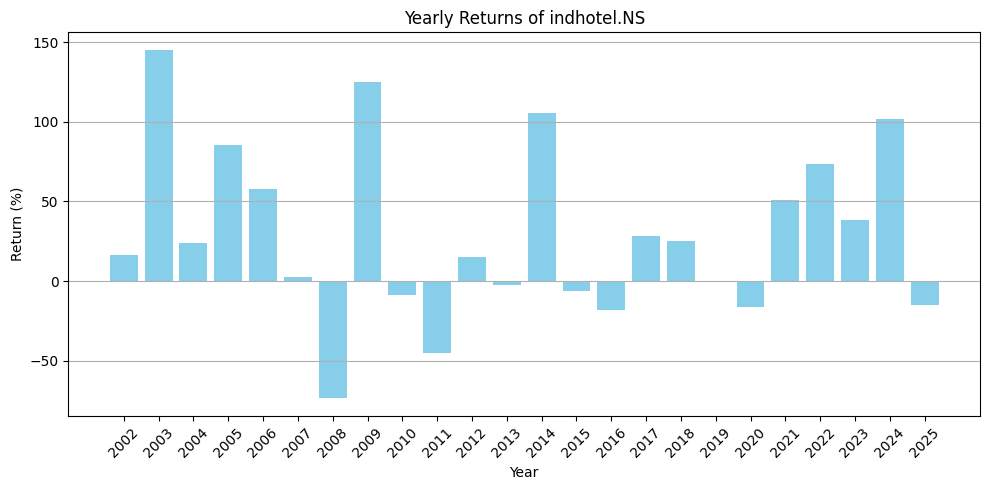

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Replace with AIIL's actual ticker if available. For example purposes, using an index/mutual fund proxy
# For Axis Bluechip Fund (Regular Growth), Yahoo Finance doesn't have direct data.
# We can use NIFTY 50 or Sensex as a proxy, or use NAV data from AMFI via API/web scraping if needed.
ticker_symbol = "indhotel.NS"  # Replace this with actual fund ticker or NAV-based data if needed

# Download from max available date
data = yf.download(ticker_symbol, start="2000-01-01", auto_adjust=True)

# Ensure the data is present
if data.empty:
    print("Data not available for this ticker.")
else:
    # Resample to get only the closing price on Jan 1 and Dec 31 each year
    data['Year'] = data.index.year
    yearly_data = data.resample('Y').last()
    yearly_data['Start'] = data.resample('Y').first()['Close']
    yearly_data['End'] = yearly_data['Close']

    # Calculate annual return
    yearly_data['Return (%)'] = ((yearly_data['End'] - yearly_data['Start']) / yearly_data['Start']) * 100
    yearly_data = yearly_data[['Start', 'End', 'Return (%)']]
    yearly_data.index = yearly_data.index.year

    print("\nYearly Return Table:")
    print(yearly_data)

    # Plotting bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(yearly_data.index.astype(str), yearly_data['Return (%)'], color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Return (%)')
    plt.title(f'Yearly Returns of {ticker_symbol}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [3]:
%%writefile mf.py
import streamlit as st
import pandas as pd

st.set_page_config(page_title="Mutual Fund Filter", layout="wide")
st.title("🧮 Mutual Fund Filter (All Categories + Return Filters)")

# --- Sample Data ---
@st.cache_data
def load_data():
    data = {
        "Fund Name": [
            "Axis Bluechip", "SBI Small Cap", "HDFC Mid Cap", "ICICI Pru Equity", "Mirae Large Cap"
        ],
        "Category": [
            "Large Cap", "Small Cap", "Mid Cap", "Multi Cap", "Large Cap"
        ],
        "1W Return (%)": [0.8, 1.5, 1.1, 0.9, 1.3],
        "1M Return (%)": [3.2, 4.1, 3.8, 3.5, 4.0],
        "3M Return (%)": [8.0, 12.5, 10.1, 9.8, 11.3],
        "6M Return (%)": [14.5, 22.1, 18.7, 16.5, 20.2],
    }
    df = pd.DataFrame(data)
    return df

df = load_data()

# --- Sidebar Filters ---
st.sidebar.header("🔍 Filter Options")

categories = df["Category"].unique().tolist()
selected_categories = st.sidebar.multiselect("Select Category", categories, default=categories)

min_1w = st.sidebar.slider("Min 1 Week Return (%)", min_value=0.0, max_value=5.0, value=0.0, step=0.1)
min_1m = st.sidebar.slider("Min 1 Month Return (%)", min_value=0.0, max_value=10.0, value=0.0, step=0.1)
min_3m = st.sidebar.slider("Min 3 Month Return (%)", min_value=0.0, max_value=20.0, value=0.0, step=0.5)
min_6m = st.sidebar.slider("Min 6 Month Return (%)", min_value=0.0, max_value=30.0, value=0.0, step=0.5)

# --- Filtering ---
filtered_df = df[
    (df["Category"].isin(selected_categories)) &
    (df["1W Return (%)"] >= min_1w) &
    (df["1M Return (%)"] >= min_1m) &
    (df["3M Return (%)"] >= min_3m) &
    (df["6M Return (%)"] >= min_6m)
]

# --- Display Results ---
st.subheader(f"📊 Filtered Mutual Funds ({len(filtered_df)} results)")
st.dataframe(filtered_df, use_container_width=True)


Writing mf.py


In [7]:
import streamlit as st
import pandas as pd

st.set_page_config(page_title="MF & ETF Filter", layout="wide")
st.title("📈 Mutual Fund & ETF Filter App")

# --- Sample Data (MF + ETFs) ---
@st.cache_data
def load_data():
    data = {
        "Fund Name": [
            "Axis Bluechip", "SBI Small Cap", "HDFC Mid Cap", "ICICI Pru Equity", "Mirae Large Cap",
            "Nippon India ETF Nifty BeES", "ICICI Pru Gold ETF", "Motilal Nasdaq ETF"
        ],
        "Category": [
            "Large Cap", "Small Cap", "Mid Cap", "Multi Cap", "Large Cap",
            "ETF - Index", "ETF - Gold", "ETF - International"
        ],
        "1W Return (%)": [0.8, 1.5, 1.1, 0.9, 1.3, 0.7, 0.5, 1.0],
        "1M Return (%)": [3.2, 4.1, 3.8, 3.5, 4.0, 3.1, 2.5, 4.5],
        "3M Return (%)": [8.0, 12.5, 10.1, 9.8, 11.3, 6.8, 4.4, 10.2],
        "6M Return (%)": [14.5, 22.1, 18.7, 16.5, 20.2, 12.3, 7.5, 17.6],
        "1Y Return (%)": [23.5, 38.2, 30.6, 27.1, 33.8, 20.1, 12.5, 25.0],
    }
    return pd.DataFrame(data)

df = load_data()

# --- Sidebar Filters ---
st.sidebar.header("🔍 Filter Options")

categories = df["Category"].unique().tolist()
selected_categories = st.sidebar.multiselect("Select Category", categories, default=categories)

min_1w = st.sidebar.slider("Min 1 Week Return (%)", 0.0, 5.0, 0.0, step=0.1)
min_1m = st.sidebar.slider("Min 1 Month Return (%)", 0.0, 10.0, 0.0, step=0.1)
min_3m = st.sidebar.slider("Min 3 Month Return (%)", 0.0, 20.0, 0.0, step=0.5)
min_6m = st.sidebar.slider("Min 6 Month Return (%)", 0.0, 30.0, 0.0, step=0.5)
min_1y = st.sidebar.slider("Min 1 Year Return (%)", 0.0, 50.0, 0.0, step=1.0)

# --- Apply Filters ---
filtered_df = df[
    (df["Category"].isin(selected_categories)) &
    (df["1W Return (%)"] >= min_1w) &
    (df["1M Return (%)"] >= min_1m) &
    (df["3M Return (%)"] >= min_3m) &
    (df["6M Return (%)"] >= min_6m) &
    (df["1Y Return (%)"] >= min_1y)
]

# --- Display Results ---
st.subheader(f"🔎 Filtered Results ({len(filtered_df)} funds found)")
st.dataframe(filtered_df, use_container_width=True)

st.markdown("✅ *Use the sidebar to filter by fund category and return periods up to 1 year.*")


2025-08-01 22:12:45.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 22:12:45.460 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 22:12:45.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 22:12:45.463 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 22:12:45.465 No runtime found, using MemoryCacheStorageManager
2025-08-01 22:12:45.469 No runtime found, using MemoryCacheStorageManager
2025-08-01 22:12:45.470 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 22:12:45.473 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 22:12:45.474 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

DeltaGenerator()

In [9]:
! streamlit run mf.py

^C


In [ ]:
%%writefile stock.py
import streamlit as st
import pandas as pd

st.set_page_config(page_title="Stock Return Filter", layout="wide")
st.title("📈 Stock Return Filter App")

# Upload CSV file
uploaded_file = st.file_uploader("Upload stock returns CSV", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    st.markdown("### 📊 Filter by Return Ranges (%)")

    # Create slider filters for each return period
    cols = st.columns(4)
    filters = {}

    with cols[0]:
        filters['1D'] = st.slider("1 Day Return (%)", -20.0, 20.0, (-20.0, 20.0))
        filters['1W'] = st.slider("1 Week Return (%)", -50.0, 50.0, (-50.0, 50.0))
    with cols[1]:
        filters['1M'] = st.slider("1 Month Return (%)", -50.0, 50.0, (-50.0, 50.0))
        filters['3M'] = st.slider("3 Month Return (%)", -50.0, 50.0, (-50.0, 50.0))
    with cols[2]:
        filters['6M'] = st.slider("6 Month Return (%)", -100.0, 100.0, (-100.0, 100.0))
        filters['1Y'] = st.slider("1 Year Return (%)", -100.0, 100.0, (-100.0, 100.0))
    with cols[3]:
        filters['YTD'] = st.slider("YTD Return (%)", -100.0, 100.0, (-100.0, 100.0))

    # Filter logic
    filtered_df = df.copy()
    for period, (min_val, max_val) in filters.items():
        filtered_df = filtered_df[(filtered_df[period] >= min_val) & (filtered_df[period] <= max_val)]

    st.markdown(f"### ✅ {len(filtered_df)} stocks matched your filter")
    st.dataframe(filtered_df, use_container_width=True)


In [ ]:
! streamlit run mf.py

In [5]:
%%writefile retirement.py
# retirement_tool.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

st.set_page_config(page_title="Retirement Planning Tool")

st.title("🧓 Retirement Planning Tool")

# User Inputs
current_age = st.slider("Current Age", 18, 65, 30)
retirement_age = st.slider("Retirement Age", current_age+1, 80, 60)
life_expectancy = st.slider("Life Expectancy", retirement_age+1, 100, 85)

current_savings = st.number_input("Current Savings (₹)", value=500000.0)
monthly_contribution = st.number_input("Monthly Contribution (₹)", value=10000.0)
annual_return = st.slider("Expected Annual Return (%)", 1.0, 15.0, 8.0)
inflation_rate = st.slider("Expected Inflation Rate (%)", 1.0, 10.0, 5.0)
monthly_expense = st.number_input("Expected Monthly Expense in Retirement (₹)", value=30000.0)

# Calculations
years_to_retire = retirement_age - current_age
years_after_retirement = life_expectancy - retirement_age
months_to_retire = years_to_retire * 12

# Future Value of Current Savings
fv_current = current_savings * ((1 + annual_return / 100) ** years_to_retire)

# Future Value of Contributions
r = annual_return / 100 / 12
fv_contrib = monthly_contribution * (((1 + r) ** months_to_retire - 1) / r) * (1 + r)

# Total corpus at retirement
total_corpus = fv_current + fv_contrib

# Adjusted monthly expense for inflation
inflated_expense = monthly_expense * ((1 + inflation_rate / 100) ** years_to_retire)
required_corpus = inflated_expense * 12 * years_after_retirement

st.subheader("📊 Results")
st.write(f"Estimated Retirement Corpus: ₹{total_corpus:,.2f}")
st.write(f"Required Corpus (adjusted for inflation): ₹{required_corpus:,.2f}")

if total_corpus >= required_corpus:
    st.success("🎉 You are on track for retirement!")
else:
    shortfall = required_corpus - total_corpus
    st.error(f"⚠️ You may fall short by ₹{shortfall:,.2f}. Consider increasing contributions.")

# Chart
years = np.arange(current_age, retirement_age + 1)
growth = [current_savings]
for i in range(1, len(years)):
    growth.append((growth[-1] + monthly_contribution * 12) * (1 + annual_return / 100))

st.line_chart(data=growth, x=years, y=["Retirement Fund Growth"])


Overwriting retirement.py


In [ ]:
! streamlit run compound.py